# Objective:

Your Goal: Your goal is to predict whether a client will subscribe to a bank term deposit.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from src.config import DATA_PATH, MODEL_PATH, RESULT_PATH

sns.set_theme(style="whitegrid", palette="pastel")
pd.options.display.max_columns = 250
pd.options.display.max_colwidth = 150

# Directory


In [7]:
base_dir = Path.cwd()

train_file = "train.csv"
test_file = "test.csv"

# Start - EDA


In [8]:
df_train = pd.read_csv(DATA_PATH / train_file)
df_test = pd.read_csv(DATA_PATH / test_file)

print(df_train.shape)
display(df_train.head())

print(df_test.shape)
display(df_test.head())

(750000, 18)


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


(250000, 17)


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [9]:
display(df_train.info())
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


None

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [10]:
# Missing Data
missing_percent = (df_train.isnull().sum() / len(df_train)) * 100
missing_df_train = pd.DataFrame({"column": df_train.columns, "missing_percent": missing_percent}).sort_values(
    "missing_percent", ascending=False
)

missing_df_train.reset_index(drop=True)

,column,missing_percent
0,id,0.0
1,age,0.0
2,job,0.0
3,marital,0.0
4,education,0.0
5,default,0.0
6,balance,0.0
7,housing,0.0
8,loan,0.0
9,contact,0.0


y
0    0.879349
1    0.120651
Name: proportion, dtype: float64

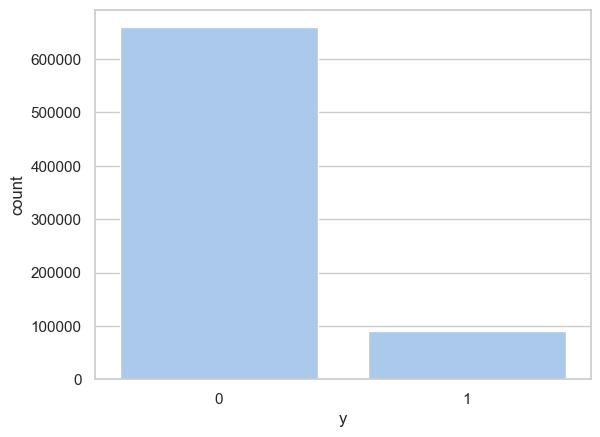

In [11]:
# Target Variable
sns.countplot(data=df_train, x="y")
display(df_train["y"].value_counts(normalize=True))

## Categories


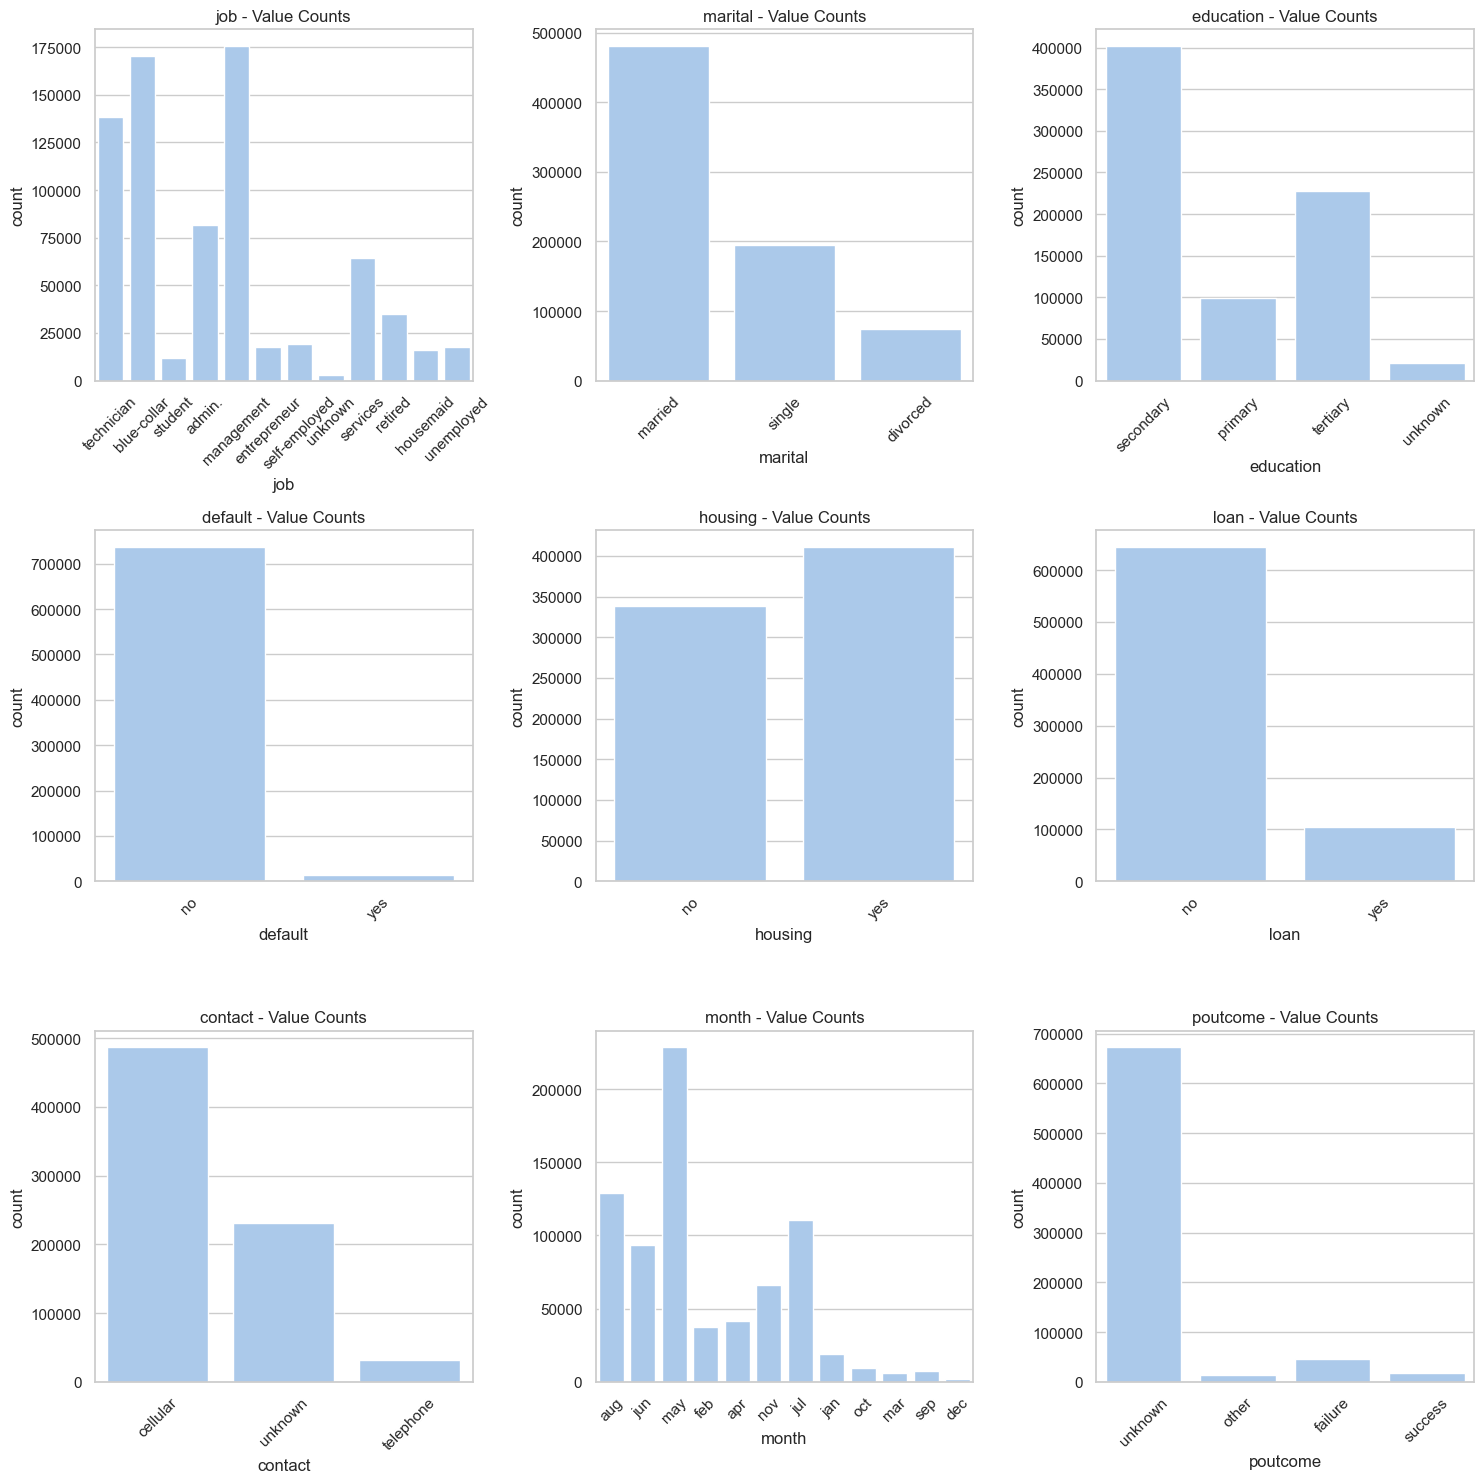

In [7]:
# Explore Cat Categories
categorical_cols = df_train.select_dtypes("O").columns

# Calculate subplot dimensions
n_cols = len(categorical_cols)
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

# Create countplots
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_train, x=col, ax=axes[i])
    axes[i].set_title(f"{col} - Value Counts")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

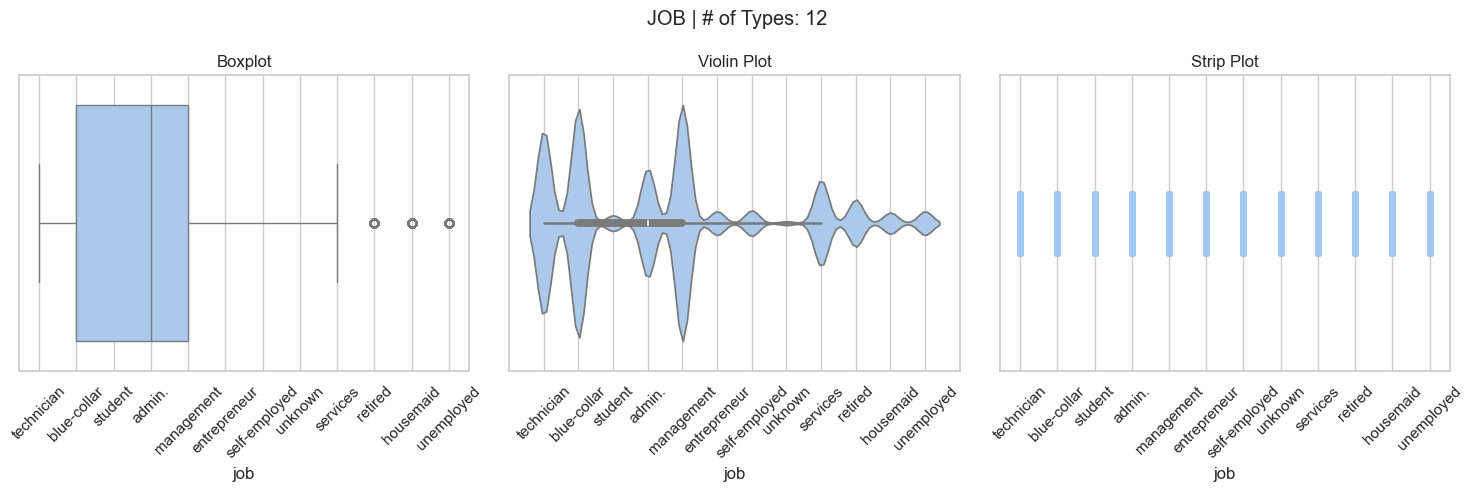

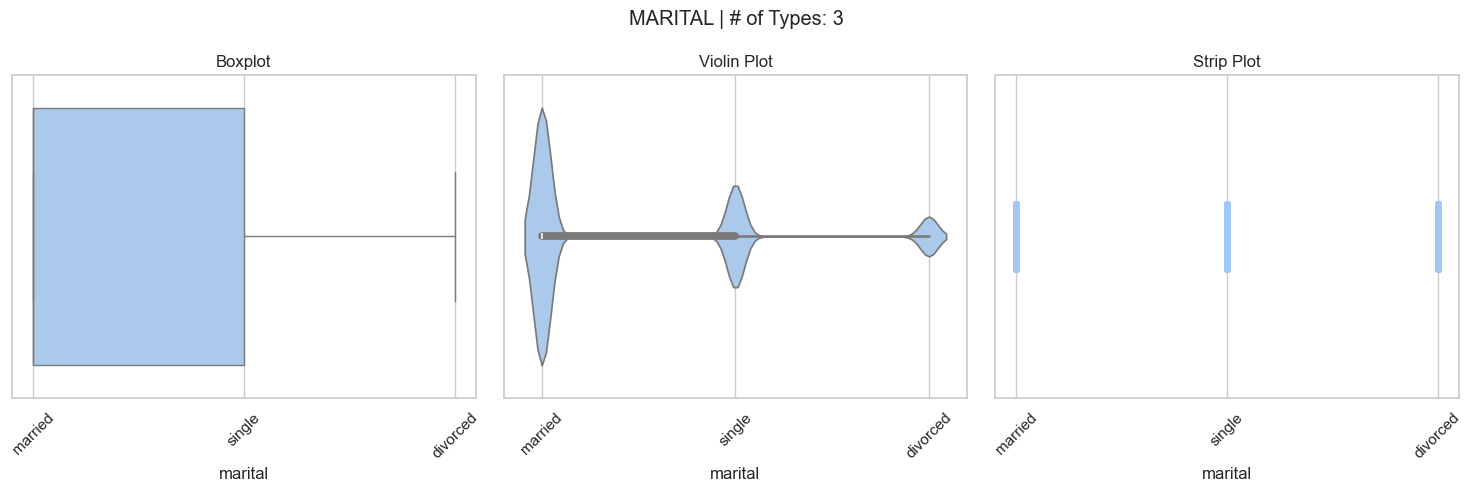

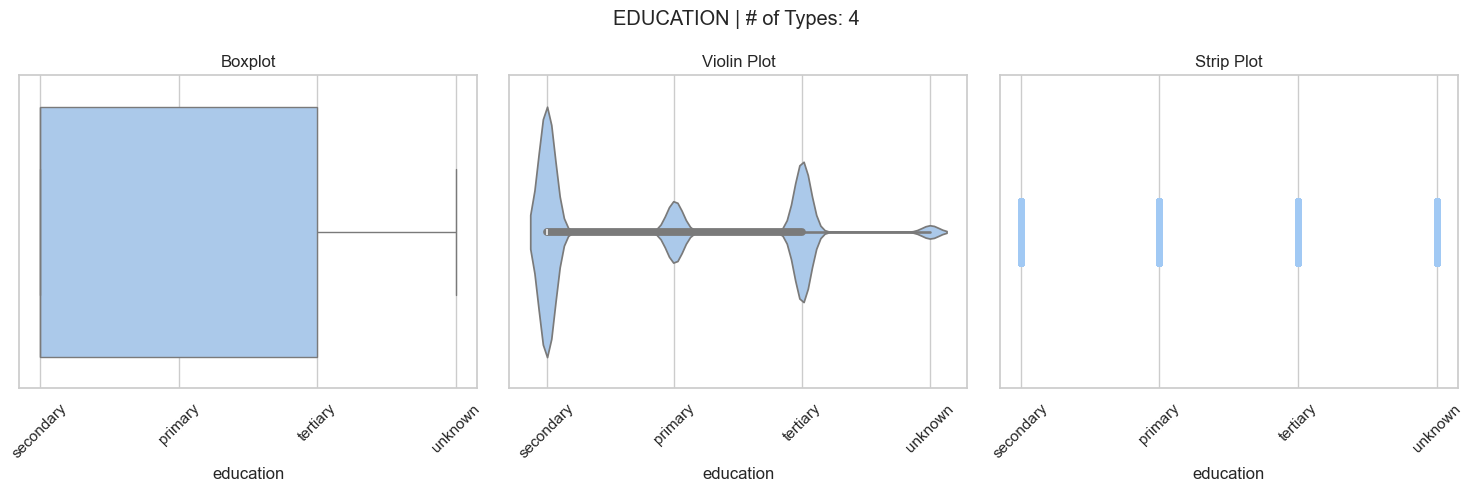

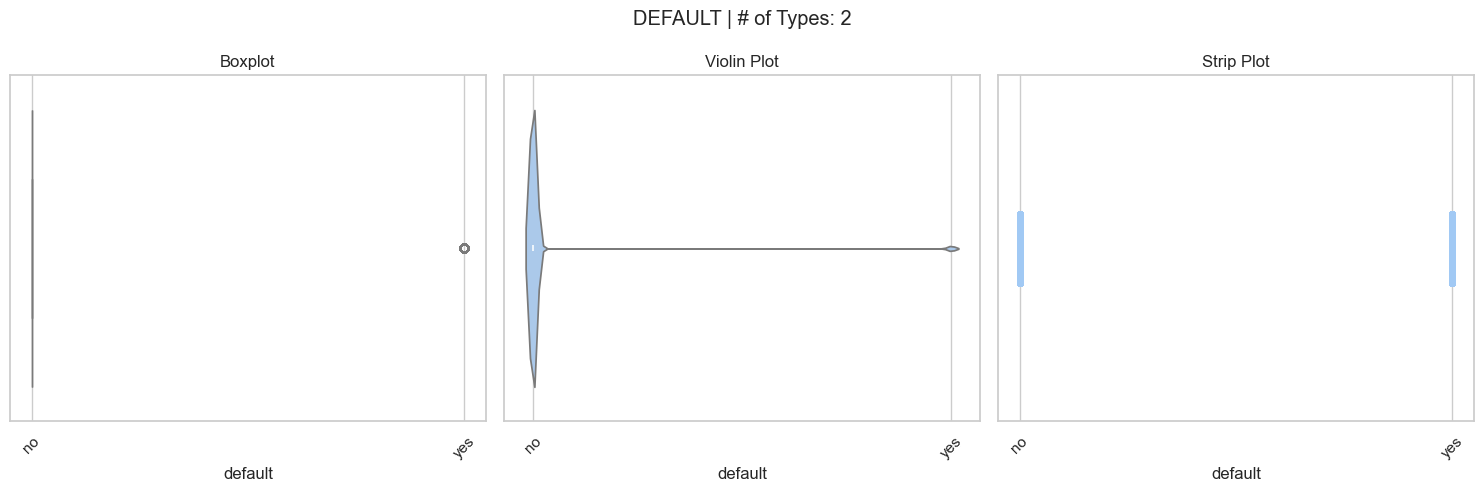

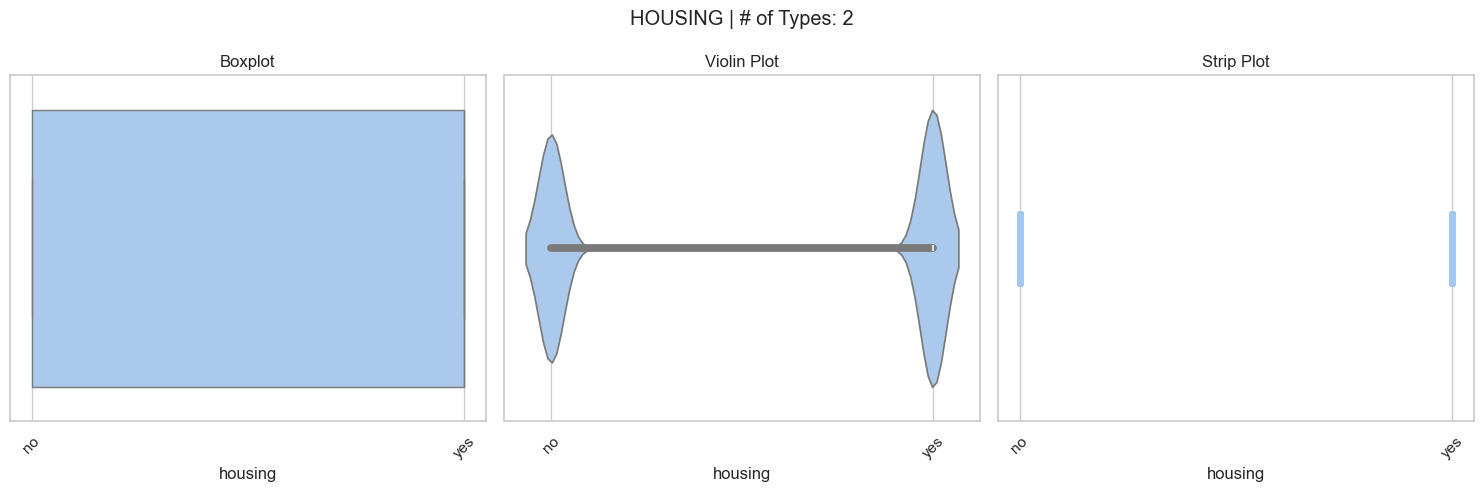

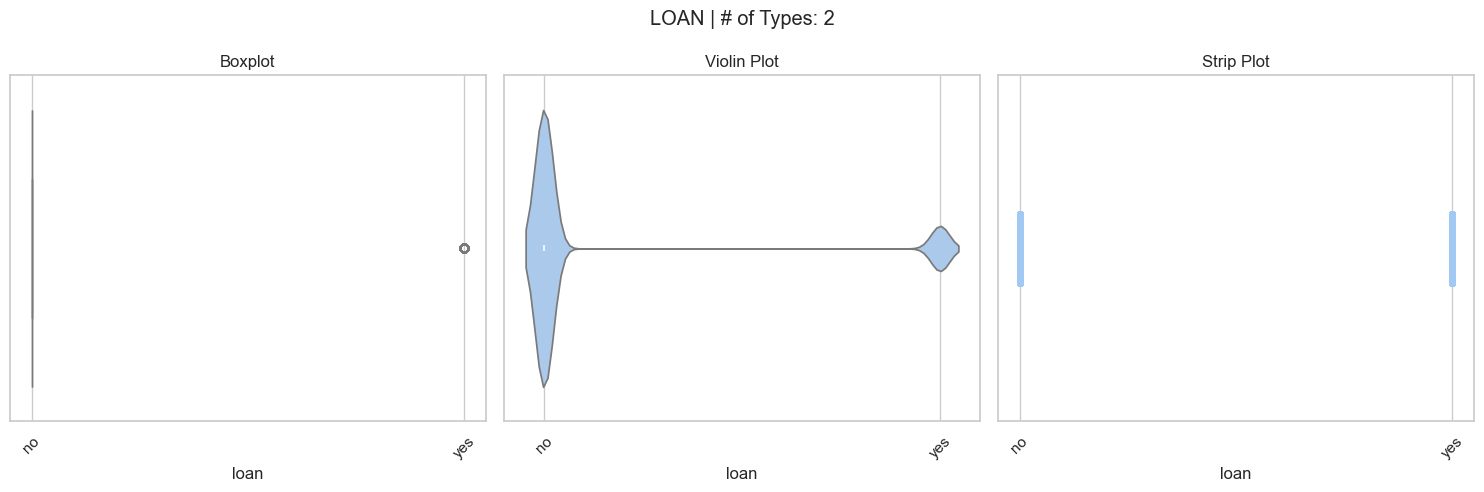

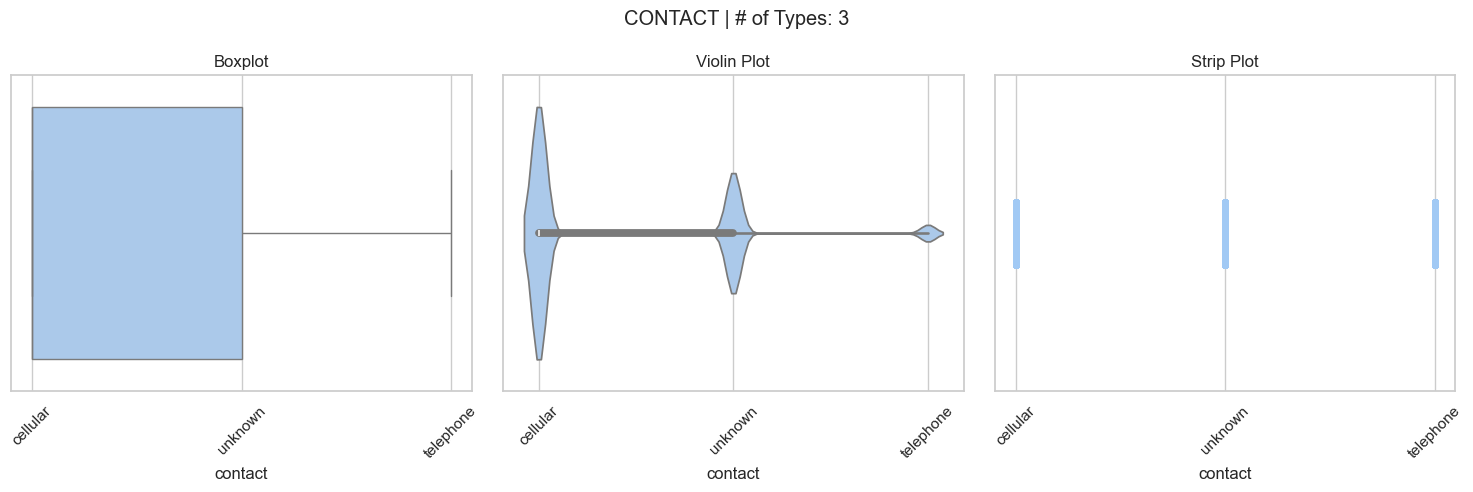

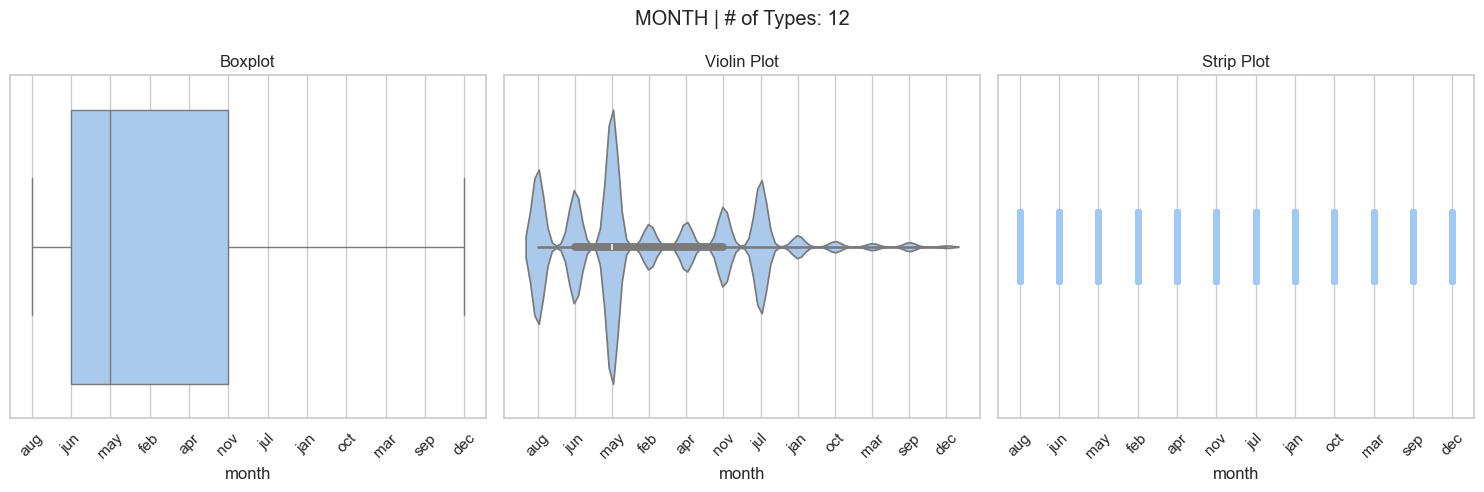

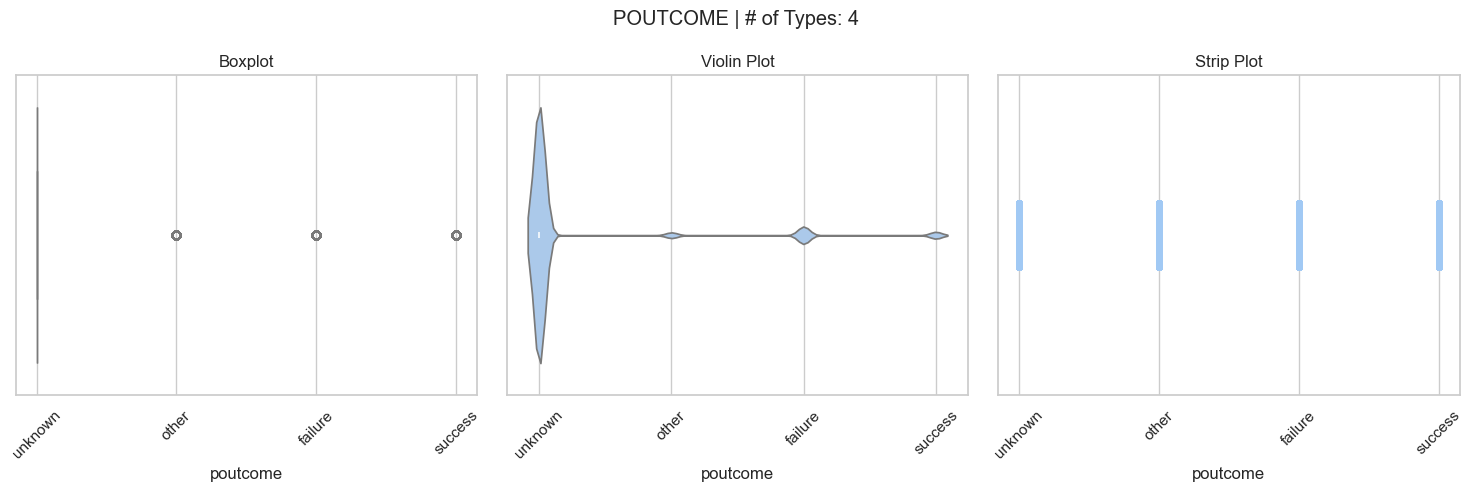

In [8]:
for col in categorical_cols:
    plt.figure(figsize=(15, 5))

    nunique = df_train[col].nunique()

    plt.suptitle(f"{col.upper()} | # of Types: {nunique}")

    plt.subplot(1, 3, 1)
    sns.boxplot(data=df_train, x=col)
    plt.title("Boxplot")
    plt.tick_params(axis="x", rotation=45)

    plt.subplot(1, 3, 2)
    sns.violinplot(data=df_train, x=col)
    plt.title("Violin Plot")
    plt.tick_params(axis="x", rotation=45)

    plt.subplot(1, 3, 3)
    sns.stripplot(data=df_train, x=col)
    plt.title("Strip Plot")
    plt.tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

## Numerical


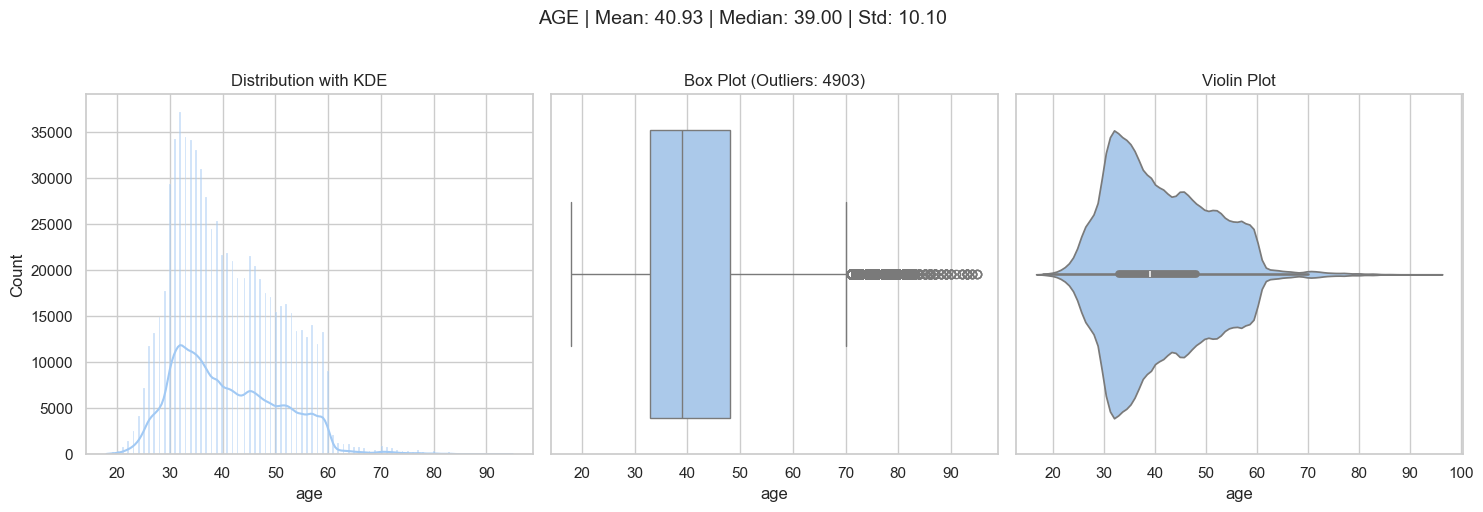

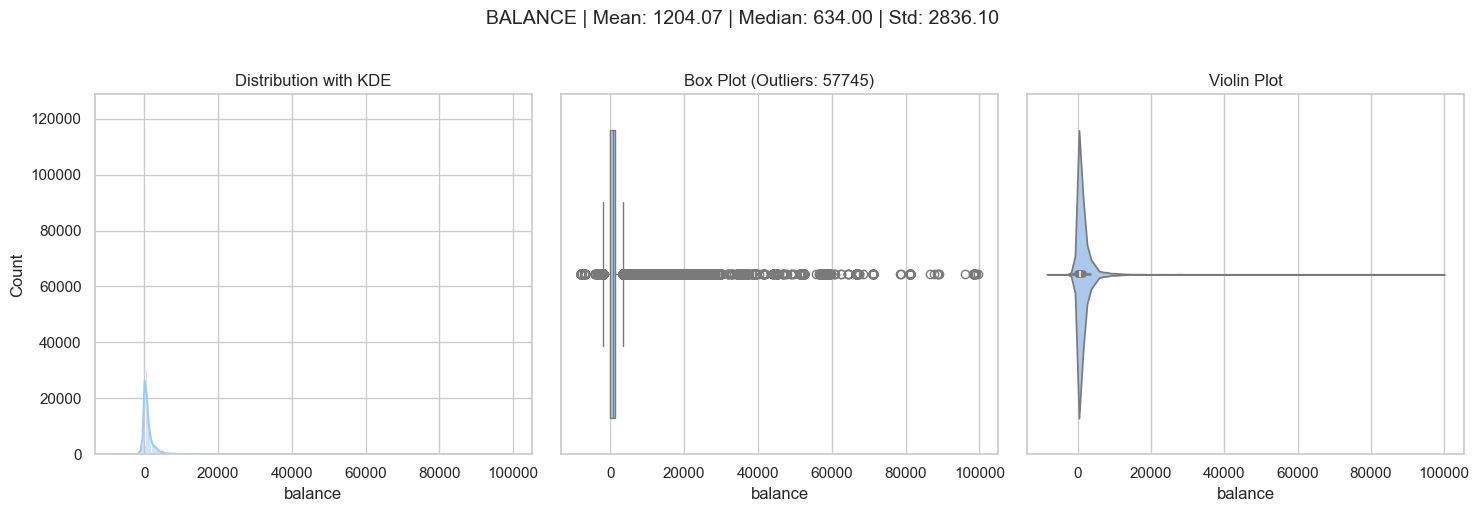

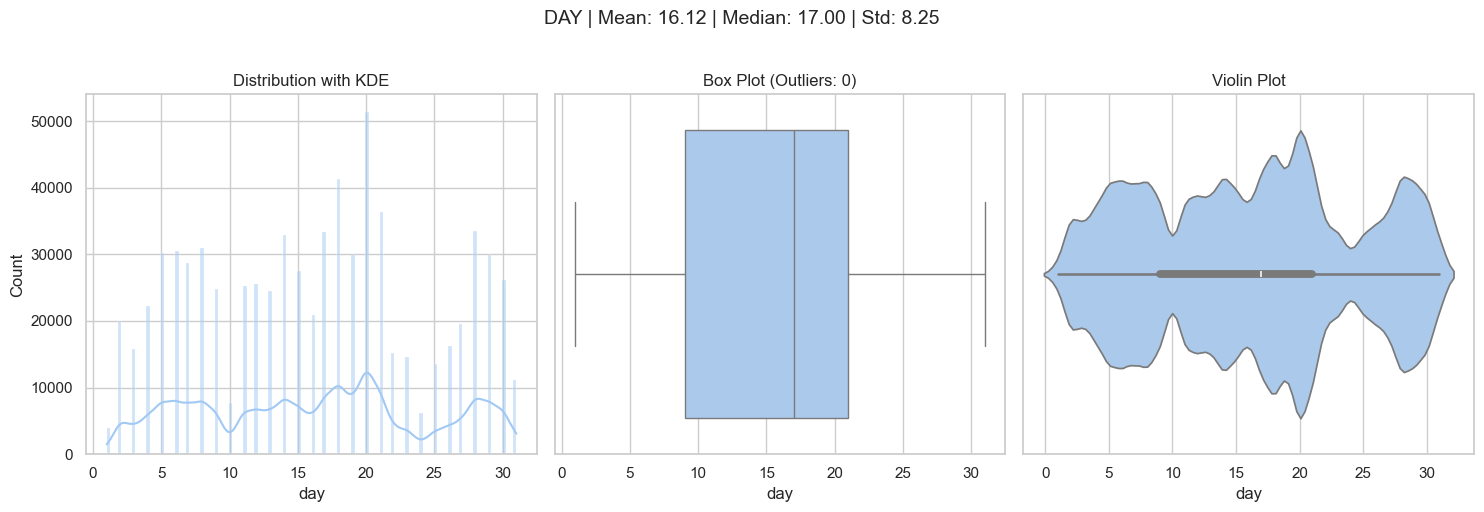

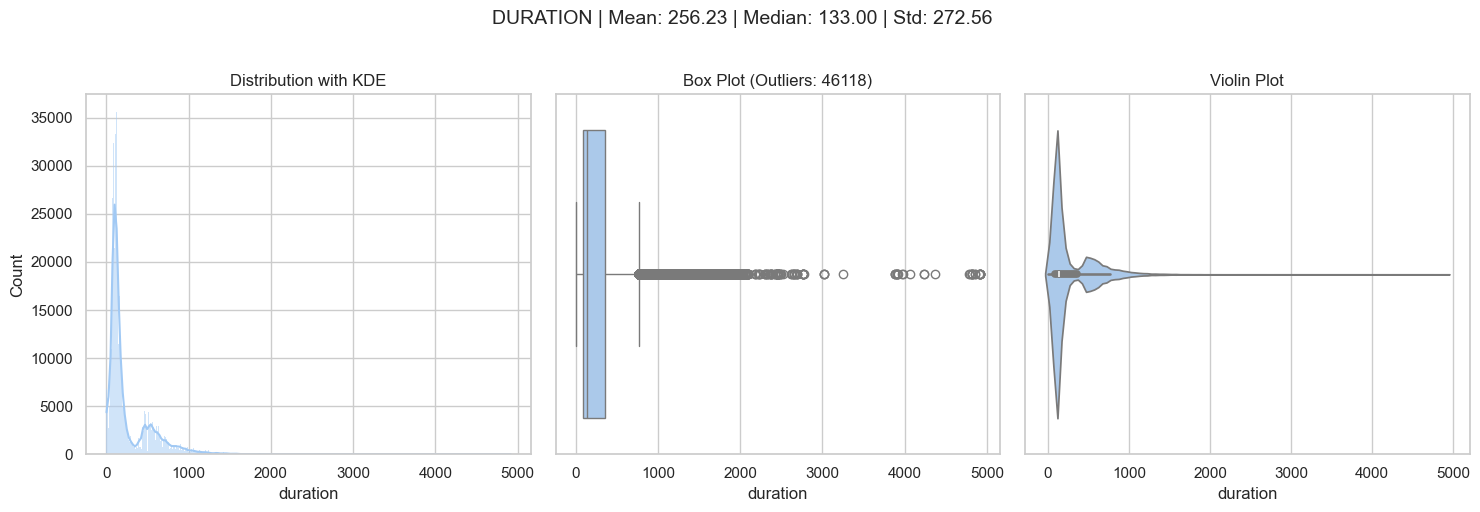

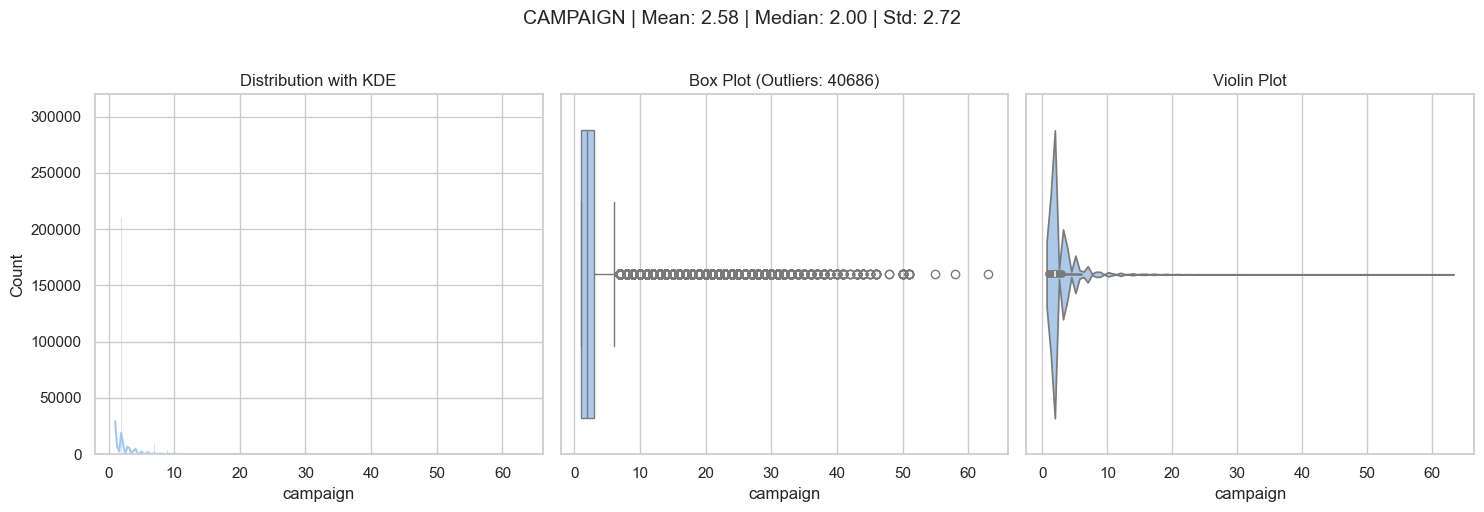

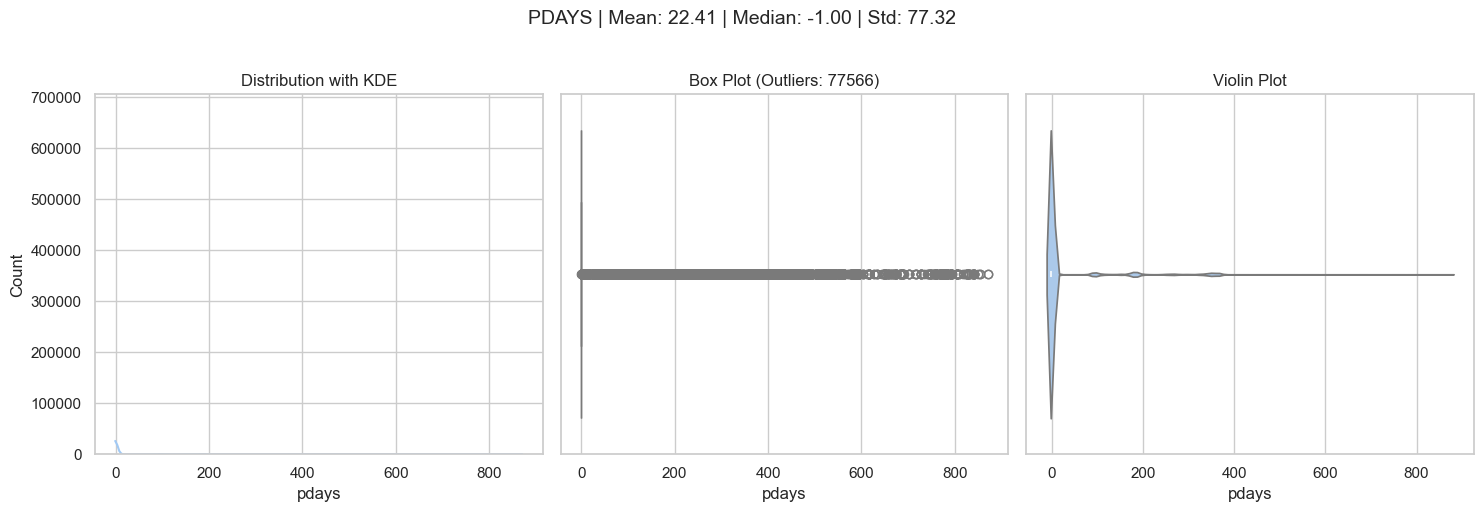

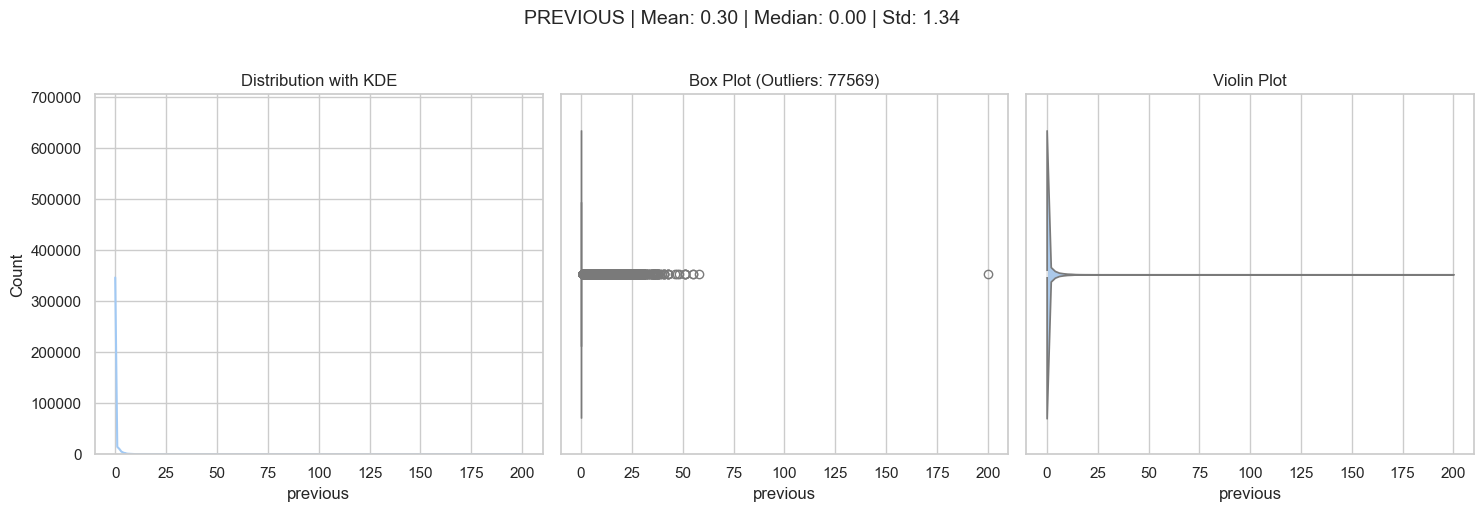

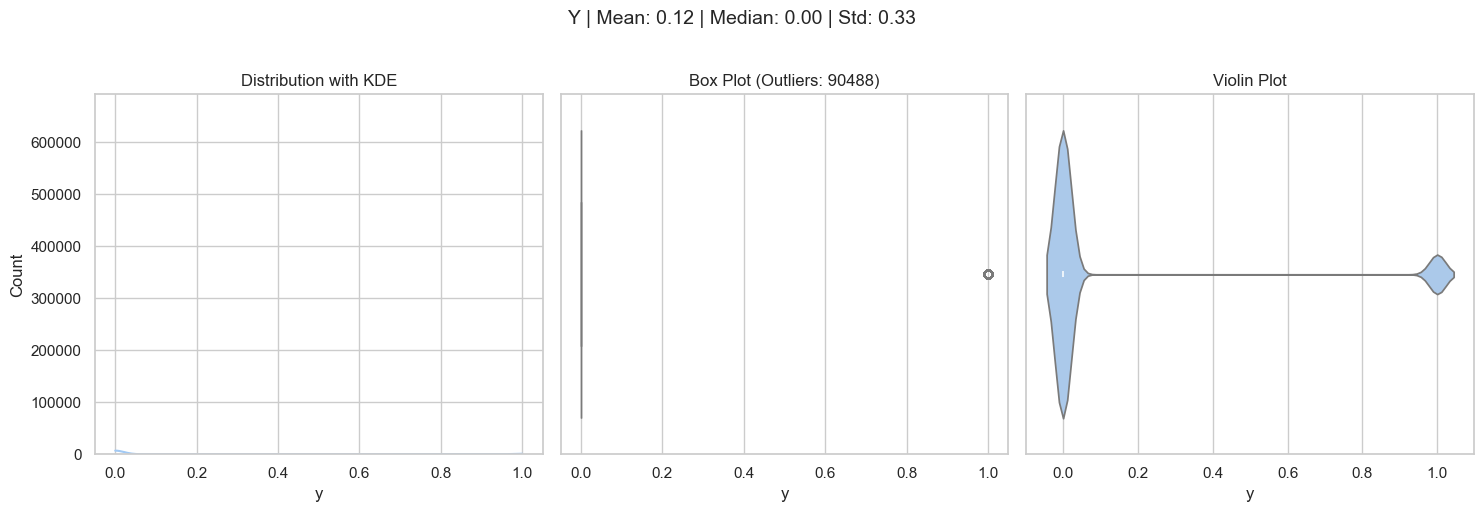

In [9]:
# Explore numerical Categories
numerical_cols = list(df_train.select_dtypes(include=[np.number]).columns)
numerical_cols.remove("id")

for col in numerical_cols:
    plt.figure(figsize=(15, 5))

    # Calculate statistics for titles
    mean_val = df_train[col].mean()
    median_val = df_train[col].median()
    std_val = df_train[col].std()

    # Main title with basic stats
    plt.suptitle(
        f"{col.upper()} | Mean: {mean_val:.2f} | Median: {median_val:.2f} | Std: {std_val:.2f}", fontsize=14, y=1.02
    )

    plt.subplot(1, 3, 1)
    sns.histplot(data=df_train, x=col, kde=True)
    plt.title("Distribution with KDE")

    plt.subplot(1, 3, 2)
    sns.boxplot(data=df_train, x=col)
    plt.title(
        f"Box Plot (Outliers: {len(df_train[(df_train[col] < df_train[col].quantile(0.25) - 1.5 * (df_train[col].quantile(0.75) - df_train[col].quantile(0.25))) | (df_train[col] > df_train[col].quantile(0.75) + 1.5 * (df_train[col].quantile(0.75) - df_train[col].quantile(0.25)))])})"
    )

    plt.subplot(1, 3, 3)
    sns.violinplot(data=df_train, x=col)
    plt.title("Violin Plot")

    plt.tight_layout()
    plt.show()

Top correlations with target:
y           1.000000
duration    0.519283
balance     0.122513
previous    0.119552
pdays       0.089277
campaign    0.075829
day         0.049625
age         0.009523
Name: y, dtype: float64


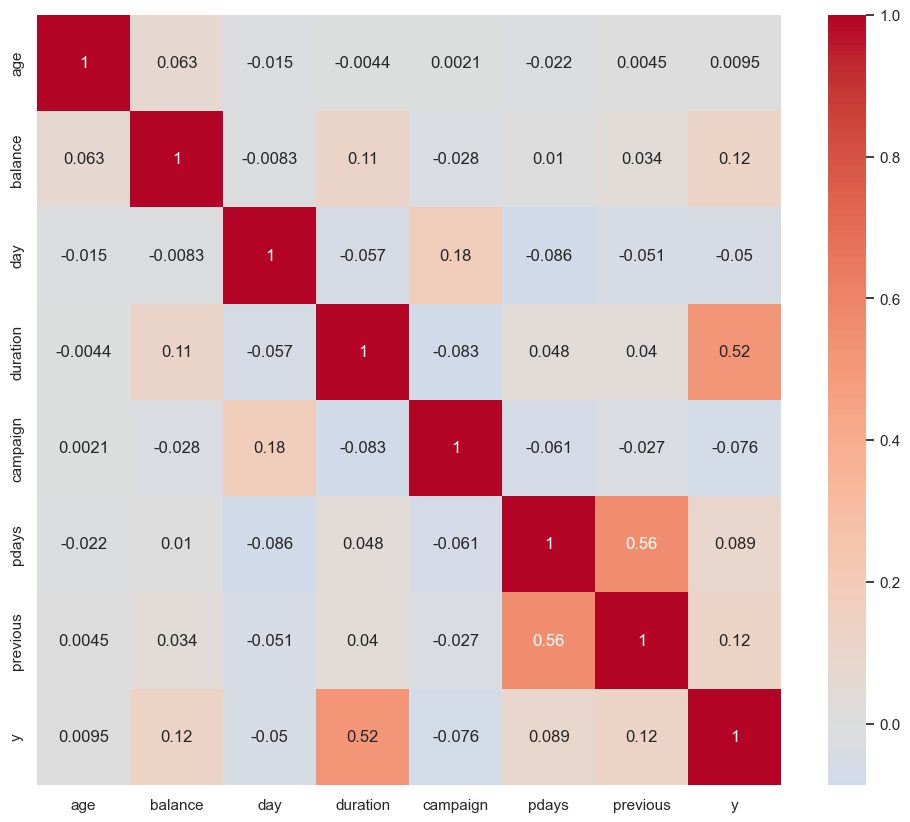

In [10]:
# Correlation
plt.figure(figsize=(12, 10))
correlation_matrix = df_train[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

# Top correlations with target
target_corr = correlation_matrix["y"].abs().sort_values(ascending=False)
print("Top correlations with target:")
print(target_corr)

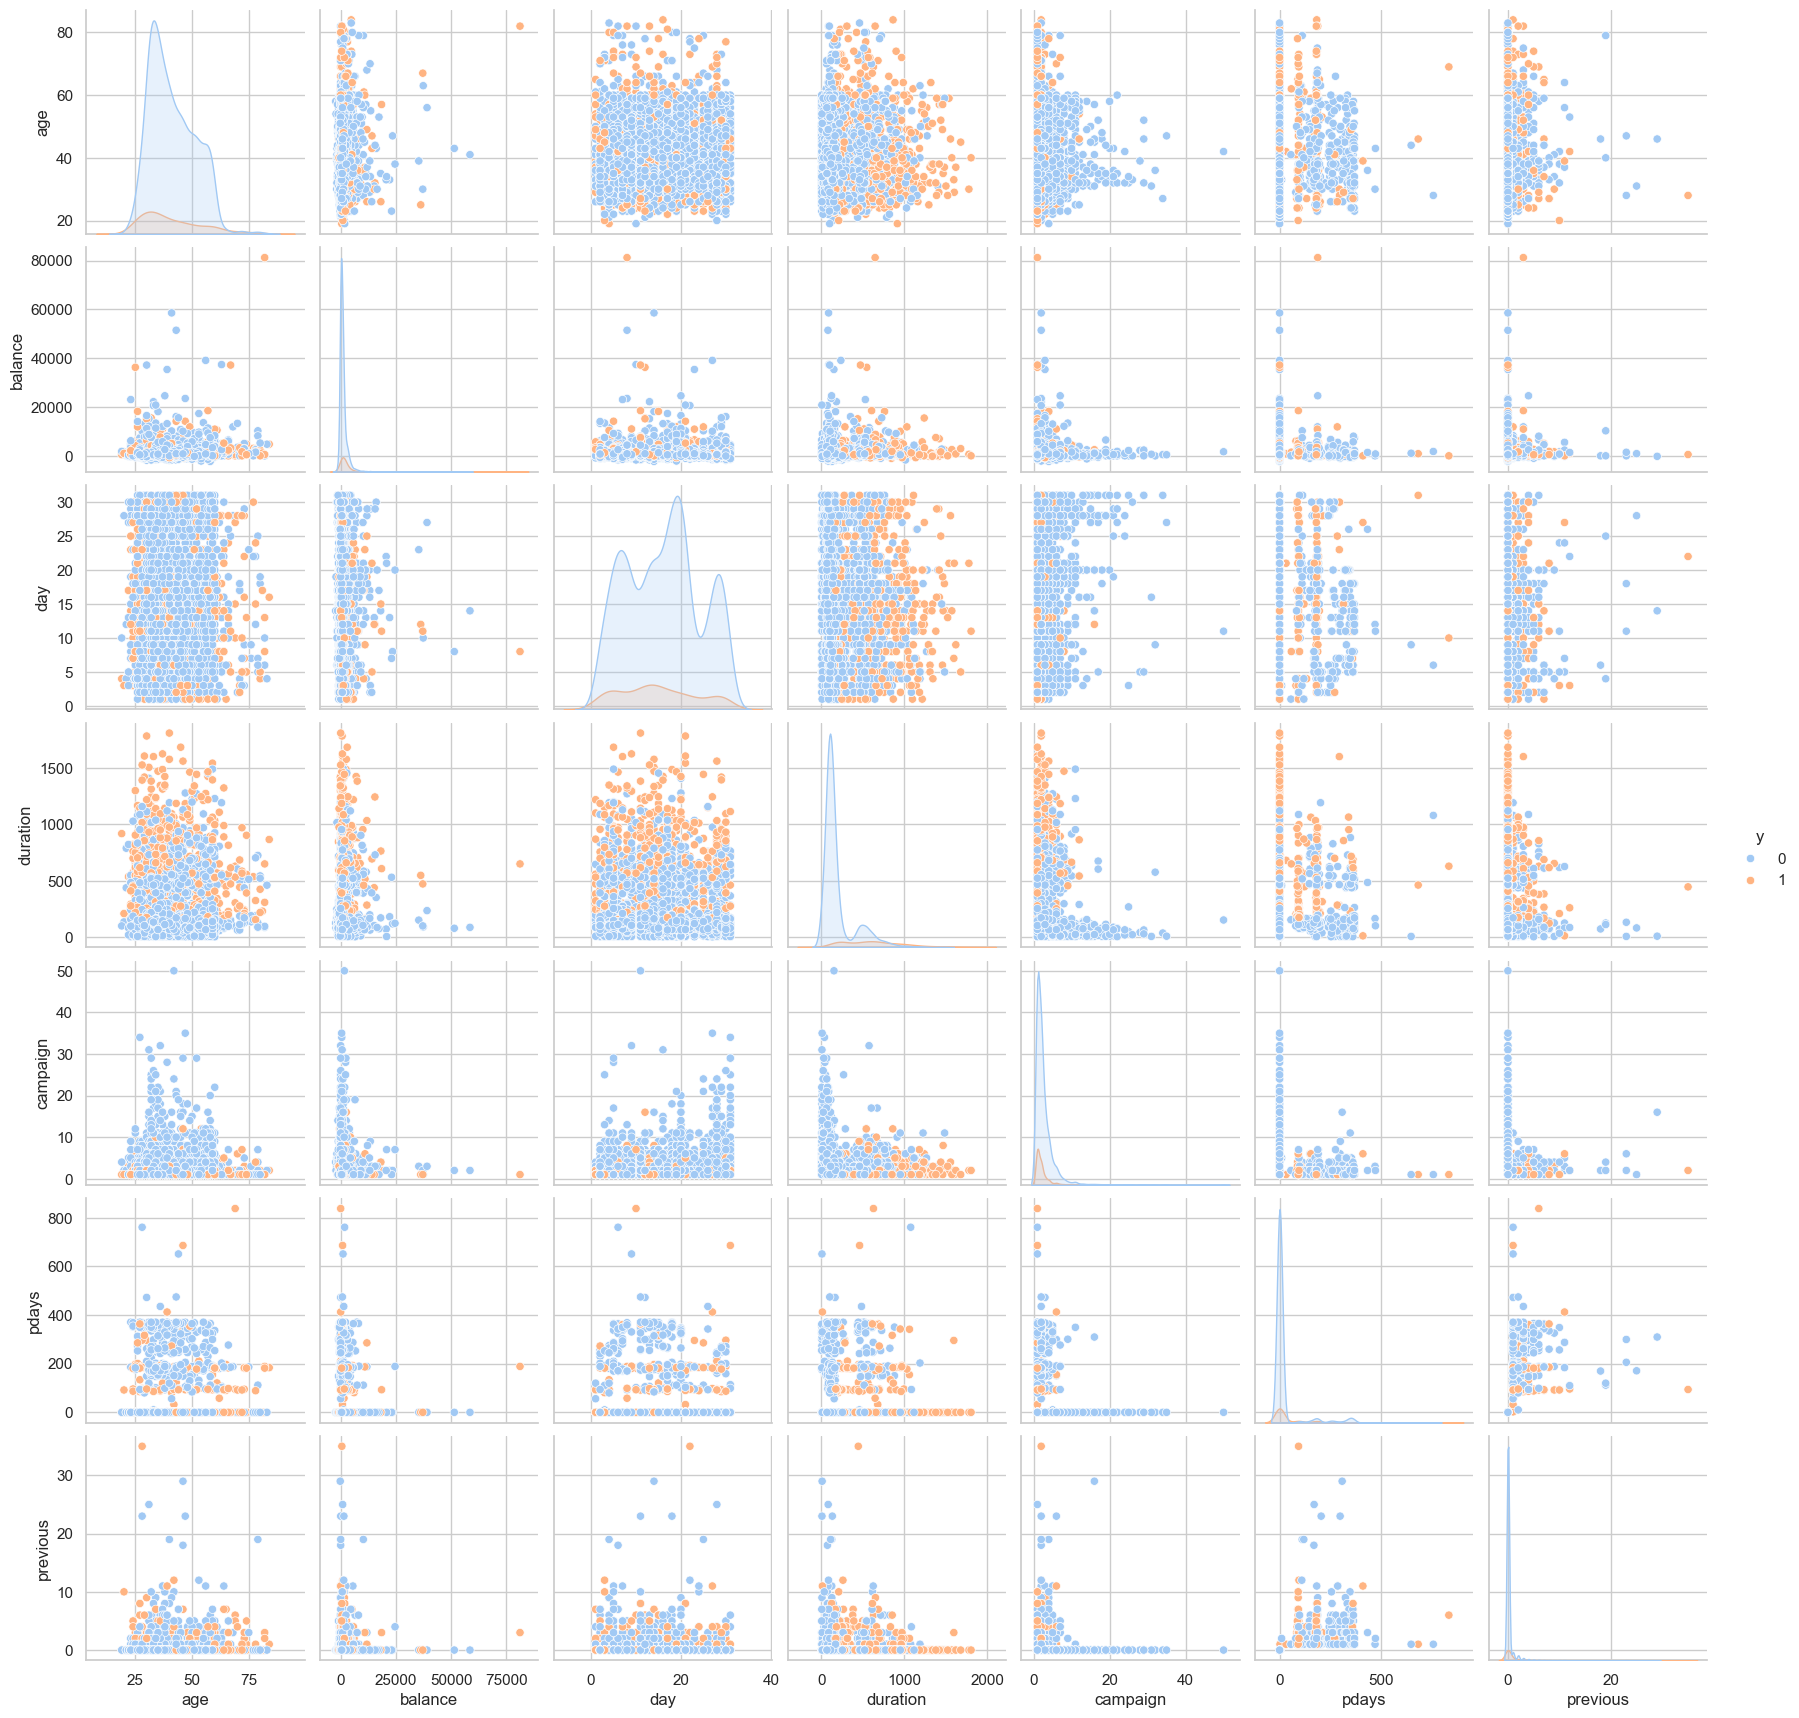

In [ ]:
# Pairwise
# sns.pairplot(df_train[numerical_cols].sample(5000), hue="y")

# Feature Engineering


In [9]:
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, StandardScaler
from sklearn.compose import ColumnTransformer

In [10]:
X = df_train.drop(["id", "y"], axis=1)
Y = df_train.loc[:, "y"]

bins_cols = ["age", "day"]
addon_bins_cols = ["balance"]
numerical_cols = X.select_dtypes(include=[np.number]).columns.to_list()
numerical_cols = [col for col in numerical_cols if col not in bins_cols and col not in addon_bins_cols]
categorical_cols = X.select_dtypes("O").columns.to_list()

preprocessor = ColumnTransformer(
    transformers=[
        ("bin_num", KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform"), bins_cols),
        ("addon_bin_num", KBinsDiscretizer(n_bins=1000, encode="ordinal", strategy="uniform"), addon_bins_cols),
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_cols),
    ]
)

transformed_array = preprocessor.fit_transform(X)
cat_feature_cols = list(preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols))
all_feature_cols = bins_cols + addon_bins_cols + numerical_cols + cat_feature_cols

df_train_post = pd.DataFrame(transformed_array, columns=all_feature_cols)
df_train_post

,age,day,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.0,4.0,75.0,-0.510829,0.155597,-0.302803,-0.223475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.0,79.0,-0.261338,-0.580100,-0.302803,-0.223475,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,2.0,80.0,-0.532843,-0.212251,-0.302803,-0.223475,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,4.0,75.0,-0.903409,-0.212251,-0.302803,-0.223475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,83.0,2.369319,-0.580100,-0.302803,-0.223475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,0.0,0.0,86.0,2.750893,-0.212251,-0.302803,-0.223475,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
749996,3.0,3.0,80.0,-0.620898,-0.580100,-0.302803,-0.223475,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
749997,2.0,2.0,77.0,-0.525505,-0.580100,-0.302803,-0.223475,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
749998,0.0,4.0,72.0,-0.543849,1.259142,-0.302803,-0.223475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# ML - Modeling


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve

Training: Logistic - model=LogisticRegression(max_iter=1000, n_jobs=-1, random_state=303, verbose=True)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.3s finished


AUC Score: 0.9432
CV Score: 0.9420 (+/- 0.0019)


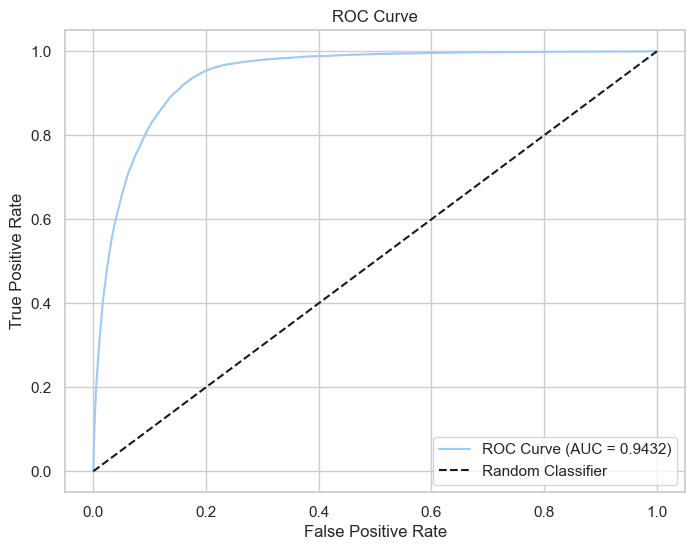

Training: Random Forest - model=RandomForestClassifier(n_jobs=-1, random_state=303, verbose=True)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.6s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.1s finished


AUC Score: 0.9579
CV Score: 0.9576 (+/- 0.0011)


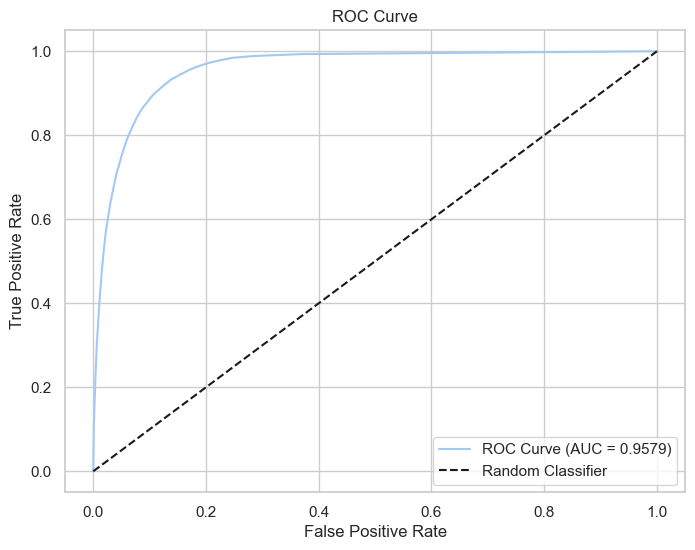

Training: Graident Boost - model=GradientBoostingClassifier(random_state=303, verbose=True)
      Iter       Train Loss   Remaining Time 
         1           0.6699            1.45m
         2           0.6267            1.43m
         3           0.5904            1.41m
         4           0.5613            1.40m
         5           0.5398            1.39m
         6           0.5222            1.38m
         7           0.5094            1.37m
         8           0.4942            1.36m
         9           0.4817            1.35m
        10           0.4699            1.33m
        20           0.4125            1.18m
        30           0.3899            1.03m
        40           0.3762           53.11s
        50           0.3672           44.17s
        60           0.3602           35.32s
        70           0.3542           26.47s
        80           0.3498           17.67s
        90           0.3463            8.83s
       100           0.3439            0.00s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


AUC Score: 0.9548
CV Score: 0.9537 (+/- 0.0014)


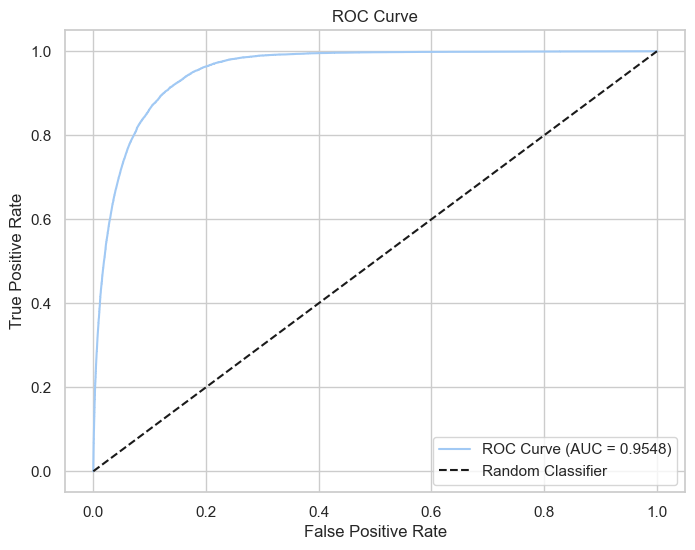

Training: Xgboost - model=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


e:\Project\kaggle\playground_series_s5-ep8\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:01:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.7s finished


AUC Score: 0.9653
CV Score: 0.9643 (+/- 0.0010)


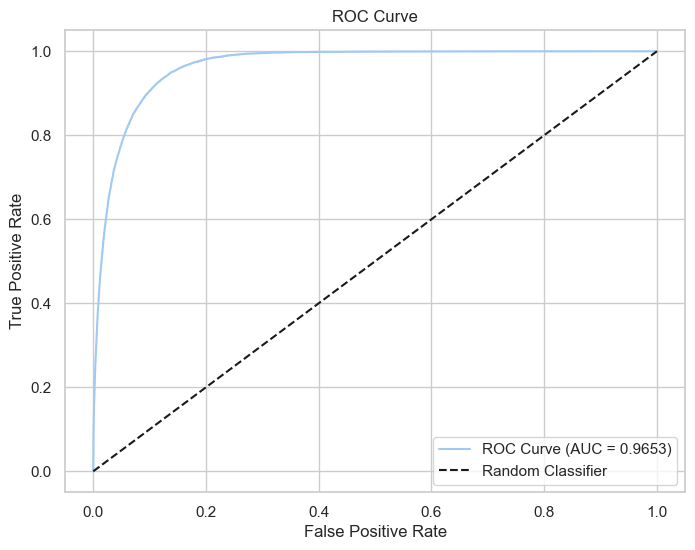

In [ ]:
rdn_state = 303
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=rdn_state)

models = {
    "Logistic": LogisticRegression(random_state=rdn_state, max_iter=1000, n_jobs=-1, verbose=True),
    "Random Forest": RandomForestClassifier(random_state=rdn_state, n_estimators=100, n_jobs=-1, verbose=True),
    "Graident Boost": GradientBoostingClassifier(random_state=rdn_state, verbose=True),
    "Xgboost": XGBClassifier(random_state=rdn_state),
}

results = {}
trained_pipeline = {}

for name, model in models.items():
    print(f"Training: {name} - {model=}")
    pipeline = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("classifer", model),
        ]
    )
    pipeline.fit(x_train, y_train)

    y_pred = pipeline.predict(x_test)
    y_pred_prob = pipeline.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_prob)

    cv_scores = cross_val_score(pipeline, X, Y, cv=5, scoring="roc_auc", verbose=True, n_jobs=-1)

    results[name] = {
        "auc_score": auc_score,
        "cv_mean": cv_scores.mean(),
        "cv_std": cv_scores.std(),
    }
    trained_pipeline[name] = pipeline

    print(f"AUC Score: {auc_score:.4f}")
    print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


## Choose Best Model


In [13]:
best_model_name = max(results, key=lambda x: results[x]["auc_score"])
print(f"\n=== BEST MODEL: {best_model_name} ===")
print(f"Best Validation Accuracy: {results[best_model_name]['auc_score']:.4f}")


=== BEST MODEL: Xgboost ===
Best Validation Accuracy: 0.9653


# Fine-Tuning


In [14]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grids = {
    "Logistic Regression": {
        "classifier__C": [0.1, 1, 10],
        "classifier__penalty": ["l1", "l2"],
    },
    "Random Forest": {
        "classifier__n_estimators": [100, 200],
        "classifier__max_depth": [10, 20, None],
        "classifier__min_samples_split": [2, 5],
    },
    "Gradient Boosting": {
        "classifier__n_estimators": [100, 200],
        "classifier__learning_rate": [0.05, 0.1],
        "classifier__max_depth": [3, 5],
    },
    "Xgboost": {
        "classifier__n_estimators": [50, 100, 150],
        "classifier__max_depth": [3, 4, 5, 6],
        "classifier__learning_rate": [0.05, 0.1, 0.15, 0.2],
        "classifier__subsample": [0.7, 0.8, 0.9, 1.0],
    },
}

best_model = models.get(best_model_name)

pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", best_model)])

# Grid search
grid_search = GridSearchCV(pipeline, param_grids[best_model_name], cv=3, scoring="accuracy", n_jobs=1, verbose=True)
grid_search.fit(X, Y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Best parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 6, 'classifier__n_estimators': 150, 'classifier__subsample': 0.8}
Best CV score: 0.9328


In [24]:
best_model = grid_search.best_estimator_
best_model

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bin_num', ...), ('addon_bin_num', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Neural Network


In [70]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

torch.cuda.manual_seed(303)
torch.cuda.manual_seed_all(303)

Using cuda device


In [71]:
x_train, x_test, y_train, y_test = train_test_split(df_train_post, Y, test_size=0.2, random_state=rdn_state)

X_train_tensor = torch.FloatTensor(x_train.values).to(device)
y_train_tensor = torch.LongTensor(y_train.values).to(device)
X_test_tensor = torch.FloatTensor(x_test.values).to(device)
y_test_tensor = torch.LongTensor(y_test.values).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [72]:
class TorchClassifer(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes),
        )

    def forward(self, x):
        return self.network(x)


model = TorchClassifer(input_size=df_train_post.shape[1], num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50

model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()

        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

    if (epoch + 1) % 10 == 0:
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

Epoch [10/50], Loss: 0.1737, Accuracy: 92.42%
Epoch [20/50], Loss: 0.1720, Accuracy: 92.56%
Epoch [30/50], Loss: 0.1714, Accuracy: 92.60%
Epoch [40/50], Loss: 0.1714, Accuracy: 92.62%
Epoch [50/50], Loss: 0.1710, Accuracy: 92.63%


In [59]:
from sklearn.metrics import accuracy_score, classification_report

In [74]:
model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        # Move batch to device
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)

        # Move back to CPU for sklearn metrics
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(batch_y.cpu().numpy())

test_accuracy = accuracy_score(all_targets, all_predictions)

print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(all_targets, all_predictions))

Test Accuracy: 0.9268

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    131908
           1       0.78      0.55      0.65     18092

    accuracy                           0.93    150000
   macro avg       0.86      0.77      0.80    150000
weighted avg       0.92      0.93      0.92    150000



## Save NN


In [ ]:
save_dict = {
    "model_state_dict": model.state_dict(),
    "preprocessor": preprocessor,  # Sklearn pipeline
    "model_config": {"input_size": df_train_post.shape[1], "num_classes": 2},
    "feature_names": list(df_train_post.columns),
}

torch.save(save_dict, MODEL_PATH / "torch_nn.pth")

## Load NN


In [176]:
import torch.nn.functional as F

torch.cuda.empty_cache()

In [ ]:
data = torch.load(MODEL_PATH / "torch_nn.pth", weights_only=False)

# Recreate model
model = TorchClassifer(**data["model_config"])
model.load_state_dict(data["model_state_dict"])
model.eval()
model.to(device)

preprocessor = data["preprocessor"]
feature_names = data["feature_names"]

In [178]:
df_test_pre = df_test.drop("id", axis=1)

X = preprocessor.transform(df_test_pre)
x_tensor = torch.FloatTensor(X)

dummy_targets = torch.zeros(len(x_tensor), dtype=torch.long)
test_dataset = TensorDataset(x_tensor, dummy_targets)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, drop_last=False)

all_predictions = []
all_probabilities = []
total_processed = 0

with torch.no_grad():
    for batch_idx, (batch_x, _) in enumerate(test_loader):
        batch_x = batch_x.to(device)

        output = model(batch_x)
        probabilities = F.softmax(output, dim=1)
        _, prediction = torch.max(output, 1)

        all_predictions.append(prediction.cpu())
        all_probabilities.append(probabilities.cpu())
        total_processed += batch_x.size(0)

        if batch_idx % 100 == 0:
            print(f"  Progress: {total_processed}/{len(df_test_pre)} ({100 * total_processed / len(df_test_pre):.1f}%)")

final_predictions = torch.cat(all_predictions, dim=0).numpy()
final_probabilities = torch.cat(all_probabilities, dim=0).numpy()

  Progress: 32/250000 (0.0%)
  Progress: 3232/250000 (1.3%)
  Progress: 6432/250000 (2.6%)
  Progress: 9632/250000 (3.9%)
  Progress: 12832/250000 (5.1%)
  Progress: 16032/250000 (6.4%)
  Progress: 19232/250000 (7.7%)
  Progress: 22432/250000 (9.0%)
  Progress: 25632/250000 (10.3%)
  Progress: 28832/250000 (11.5%)
  Progress: 32032/250000 (12.8%)
  Progress: 35232/250000 (14.1%)
  Progress: 38432/250000 (15.4%)
  Progress: 41632/250000 (16.7%)
  Progress: 44832/250000 (17.9%)
  Progress: 48032/250000 (19.2%)
  Progress: 51232/250000 (20.5%)
  Progress: 54432/250000 (21.8%)
  Progress: 57632/250000 (23.1%)
  Progress: 60832/250000 (24.3%)
  Progress: 64032/250000 (25.6%)
  Progress: 67232/250000 (26.9%)
  Progress: 70432/250000 (28.2%)
  Progress: 73632/250000 (29.5%)
  Progress: 76832/250000 (30.7%)
  Progress: 80032/250000 (32.0%)
  Progress: 83232/250000 (33.3%)
  Progress: 86432/250000 (34.6%)
  Progress: 89632/250000 (35.9%)
  Progress: 92832/250000 (37.1%)
  Progress: 96032/250000

In [184]:
df_result = pd.DataFrame(final_predictions, columns=["y"])
df_final = pd.concat([df_test["id"], df_result], ignore_index=False, axis=1)

display(df_final["y"].value_counts())
df_final

y
0    228449
1     21551
Name: count, dtype: int64

,id,y
0,750000,0
1,750001,0
2,750002,0
3,750003,0
4,750004,0
...,...,...
249995,999995,0
249996,999996,0
249997,999997,0
249998,999998,0


In [185]:
df_final.to_csv(RESULT_PATH / "result_v04.csv", index=False)

# Save Model


In [61]:
import joblib

In [62]:
model_info = {
    "model": best_model,
    "feature_names": x_train.columns.tolist(),
    "model_type": best_model_name,
    "preprocessing_steps": "KBinsDiscretizer + StandardScaler + OneHotEncoder",
    "performance": {"auc": auc_score},
}

joblib.dump(model_info, "torch_nn.pkl")
print("Model saved successfully!")

Model saved successfully!


# Test Model


In [64]:
model_path = MODEL_PATH / "torch_nn.pkl"

model_info = joblib.load(model_path)
model = model_info["model"]
model

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('bin_num', ...), ('addon_bin_num', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
df_test_pre = df_test.drop("id", axis=1)

# result = model.predict(df_test_pre)
result = best_model.predict(df_test_pre)
result

array([0, 0, 0, ..., 1, 0, 0], shape=(250000,))

In [37]:
df_result = pd.DataFrame(result, columns=["y"])
df_final = pd.concat([df_test["id"], df_result], ignore_index=False, axis=1)
df_final

,id,y
0,750000,0
1,750001,0
2,750002,0
3,750003,0
4,750004,0
...,...,...
249995,999995,0
249996,999996,0
249997,999997,1
249998,999998,0


In [38]:
df_final["y"].value_counts()

y
0    223782
1     26218
Name: count, dtype: int64

In [ ]:
df_final.to_csv(RESULT_PATH / "result_v03.csv", index=False)